# Geographical Visualizations with Python

## Step 1 -3 Install the libraries folium and JSON via Anaconda,
## Import the libraries you need for your analysis (e.g., folium).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
path = 'C:/Users/RUZANNA/OneDrive/Desktop/Careerfoundry/Final Project'

In [4]:
df_orders=pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_6.2.pkl' ))

In [5]:
df_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,...,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME,RESTAURANT_NAME,MAIN_NAME_CALORIS,BASE_NAME_CALORIS,SIDE_1_NAME_CALORIS,SIDE_2_NAME_CALORIS,TOTAL_CALORIS,CALORIES CATEGORY
0,O2226026,2018-12-07 19:17:45,R10001,PICKUP,2.0,2.0,No main,No base,No side_1,No side_2,...,NaN,NaN,NaN,Columbia,NaN,NaN,NaN,NaN,NaN,NaN
1,O1279827,2018-07-14 21:23:43,R10006,IN_STORE,0.0,0.0,No main,No base,No side_1,No side_2,...,NaN,NaN,NaN,Upper East Side,NaN,NaN,NaN,NaN,NaN,NaN
2,O689957,2018-04-12 13:14:42,R10002,PICKUP,0.0,2.0,I1,I7,I11,I8,...,Farro with Summer Vegetables,Charred Broccoli with Lemon,Cauliflower with Garlic and Parmesan,Midtown,227.0,170.0,177.0,90.0,664.0,Middle calories
3,O1497863,2018-08-21 18:14:23,R10007,IN_STORE,1.0,0.0,I1,I5,I10,I9,...,Classic Brown Rice,Roasted Sweet Potatoes,Jasper Hill Mac & Cheese,Upper West Side,227.0,160.0,140.0,361.0,888.0,High Calories
4,O1497863,2018-08-21 18:14:23,R10007,IN_STORE,1.0,0.0,I1,I5,I10,I9,...,Classic Brown Rice,Roasted Sweet Potatoes,Jasper Hill Mac & Cheese,Upper West Side,227.0,160.0,170.0,361.0,918.0,High Calories


In [6]:
df_restaurants=pd.read_pickle(os.path.join(path, 'Data', 'Original Data', 'restaurants.pickle' ))

### Explanatory note: In my case, I have the addresses of restaurants, but I couldn't obtain a JSON file with street location information. Therefore, I added a new column with state names to comply with the instructions of this task. I did this mostly for practice purposes.

In [7]:
states ={'NAME': ['Columbia', 'Midtown', 'Bryant Park', 'Flatiron', 'NYU', 'Upper East Side', 'Upper West Side', 'Williamsburg'], 'STATES': ['alabama', 'california', 'florida', 'massachusetts','new york', 'texas', 'georgia', 'virginia']}
df_states = pd.DataFrame(states)
df_states

,NAME,STATES
0,Columbia,alabama
1,Midtown,california
2,Bryant Park,florida
3,Flatiron,massachusetts
4,NYU,new york
5,Upper East Side,texas
6,Upper West Side,georgia
7,Williamsburg,virginia


In [8]:
df_restaurants

,RESTAURANT_ID,NAME,ADDRESS,LAT,LONG,OPENING_DATE,DELIVERY_START
0,R10001,Columbia,"2884 Broadway, New York, NY 10025",40.811470,-73.961230,2014-08-09,2017-01-01
1,R10002,Midtown,"1379 6th Ave, New York, NY 10019",40.763640,-73.977960,2013-03-19,2018-05-01
2,R10003,Bryant Park,"70 W 40th St, New York, NY 10018",40.752911,-73.983498,2013-05-21,2018-05-01
3,R10005,Flatiron,"40 W 25th St, New York, NY 10010",40.743600,-73.991070,2013-11-14,2016-03-05
4,R10004,NYU,"109 Macdougal St, New York, NY 10012",40.729930,-74.000820,2014-01-10,2017-01-01
5,R10006,Upper East Side,"1045 Lexington Ave, New York, NY 10021",40.772010,-73.960780,2014-05-29,2017-08-02
6,R10007,Upper West Side,"2140 Broadway, New York, NY 10023",40.775430,-73.982050,2015-02-02,2017-08-02
7,R10008,Williamsburg,"45 S 3rd St, Brooklyn, NY 11249",40.713749,-73.965782,2015-10-12,2017-01-01


In [9]:
 df_restaurants = pd.merge( df_restaurants, df_states[['NAME','STATES']], on = 'NAME', how = 'left')
df_restaurants

,RESTAURANT_ID,NAME,ADDRESS,LAT,LONG,OPENING_DATE,DELIVERY_START,STATES
0,R10001,Columbia,"2884 Broadway, New York, NY 10025",40.811470,-73.961230,2014-08-09,2017-01-01,alabama
1,R10002,Midtown,"1379 6th Ave, New York, NY 10019",40.763640,-73.977960,2013-03-19,2018-05-01,california
2,R10003,Bryant Park,"70 W 40th St, New York, NY 10018",40.752911,-73.983498,2013-05-21,2018-05-01,florida
3,R10005,Flatiron,"40 W 25th St, New York, NY 10010",40.743600,-73.991070,2013-11-14,2016-03-05,massachusetts
4,R10004,NYU,"109 Macdougal St, New York, NY 10012",40.729930,-74.000820,2014-01-10,2017-01-01,new york
5,R10006,Upper East Side,"1045 Lexington Ave, New York, NY 10021",40.772010,-73.960780,2014-05-29,2017-08-02,texas
6,R10007,Upper West Side,"2140 Broadway, New York, NY 10023",40.775430,-73.982050,2015-02-02,2017-08-02,georgia
7,R10008,Williamsburg,"45 S 3rd St, Brooklyn, NY 11249",40.713749,-73.965782,2015-10-12,2017-01-01,virginia


In [10]:
 df_orders = pd.merge( df_orders, df_restaurants[['RESTAURANT_ID','STATES']], on = 'RESTAURANT_ID', how = 'left')

In [11]:
df_orders.columns

Index(['ORDER_ID', 'DATETIME', 'RESTAURANT_ID', 'TYPE', 'DRINKS', 'COOKIES',
       'MAIN', 'BASE', 'SIDE_1', 'SIDE_2', 'MAIN_NAME', 'BASE_NAME',
       'SIDE_1_NAME', 'SIDE_2_NAME', 'RESTAURANT_NAME', 'MAIN_NAME_CALORIS',
       'BASE_NAME_CALORIS', 'SIDE_1_NAME_CALORIS', 'SIDE_2_NAME_CALORIS',
       'TOTAL_CALORIS', 'CALORIES CATEGORY', 'STATES'],
      dtype='object')

In [12]:
df_orders['STATES'] = df_orders['STATES'].str.title()


In [13]:
df_orders[df_orders['STATES'] == 'Virginia'].TOTAL_CALORIS.median()

620.0

##  Step 4 - Find a JSON/GeoJSONfile containing location data that corresponds to the location data in your student project data (or use this one if your analysis is about the US).

In [14]:
# Import ".json" file for the U.S. 

#rows_geo = r'C:\Users\RUZANNA\OneDrive\Desktop\Careerfoundry\Final Project\Lessons\Lesson 6.3\rows.json'

In [15]:
# That's just in case you want to look at the JSON file contents here too:

#f = open(r'C:\Users\RUZANNA\OneDrive\Desktop\Careerfoundry\Final Project\Lessons\Lesson 6.3\rows.json')
  
# returns JSON object asa dictionary
#data = json.load(f)
  
# Iterating through the json list
#for i in data['id']:
   #print(i)


In [16]:
country_geo = r'C:\Users\RUZANNA\OneDrive\Desktop\Careerfoundry\Final Project\Lessons\Lesson 6.3\us-states.json'

In [17]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\RUZANNA\OneDrive\Desktop\Careerfoundry\Final Project\Lessons\Lesson 6.3\us-states.json')
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

## Step 5-6 Conduct consistency check

In [18]:
df_orders.isnull().sum()

ORDER_ID                    0
DATETIME                    0
RESTAURANT_ID               0
TYPE                        0
DRINKS                      0
COOKIES                     0
MAIN                        0
BASE                        0
SIDE_1                      0
SIDE_2                      0
MAIN_NAME              121650
BASE_NAME              121650
SIDE_1_NAME            121650
SIDE_2_NAME            121650
RESTAURANT_NAME             0
MAIN_NAME_CALORIS      121650
BASE_NAME_CALORIS      121650
SIDE_1_NAME_CALORIS    121650
SIDE_2_NAME_CALORIS    121650
TOTAL_CALORIS          121650
CALORIES CATEGORY      121650
STATES                      0
dtype: int64

In [19]:
df_orders.shape

(3304159, 22)

### We have empty data, and it constitutes only 3% of the total orders. It would be incorrect to drop it, as in the case of drinks and cookies, we don't have blank data. This implies that in 121,650.00 cases, clients ordered only drinks, only cookies, or both. So it is better to keep it.

## Duplicated check

In [20]:
dups = df_orders.duplicated()

In [21]:
dups

0          False
1          False
2          False
3          False
4          False
           ...  
3304154    False
3304155    False
3304156    False
3304157    False
3304158    False
Length: 3304159, dtype: bool

In [22]:
dups.shape # no duplicates

(3304159,)

In [23]:
# Another way of checking for duplicates
# Create a set to store unique elements
unique_elements = set()
duplicates = set()

for item in df_orders:
    if item in unique_elements:
        duplicates.add(item)
    else:
        unique_elements.add(item)

print("Duplicates:", list(duplicates))

Duplicates: []


### Extreme values checks

<Axes: xlabel='TOTAL_CALORIS', ylabel='Count'>

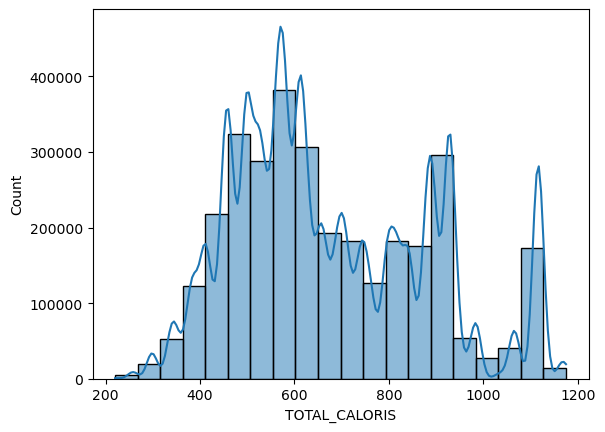

In [24]:
sns.histplot(df_orders['TOTAL_CALORIS'], bins=20, kde = True) # shows extreme values for 'fat'

### No extreme values are found

## Step 7  Create a choropleth map using a variable of your choice.

###  We will plot two maps: one showing states and total calories, and the other showing states and drinks. This will help us identify in which states customers tend to consume more heavy food and in which states customers order more drinks. 

In [25]:
# Create a data frame with just the states and the values for total calories we want plotted

data_to_plot = df_orders[['STATES','TOTAL_CALORIS']]
data_to_plot.head()

,STATES,TOTAL_CALORIS
0,Alabama,NaN
1,Texas,NaN
2,California,664.0
3,Georgia,888.0
4,Georgia,918.0


In [26]:
# Create a data frame with just the states and the values for total calories we want plotted

#data_to_plot = df_orders[['STATES','DRINKS']]
#data_to_plot.head()

In [27]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['STATES', 'TOTAL_CALORIS'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "TOTAL_CALORIS").add_to(map)
folium.LayerControl().add_to(map)

map

In [30]:
data_to_plot_2 = df_orders[['STATES','DRINKS']]
data_to_plot.head()

,STATES,DRINKS
0,Alabama,2.0
1,Texas,0.0
2,California,0.0
3,Georgia,1.0
4,Georgia,1.0


In [31]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_2,
    columns = ['STATES', 'DRINKS'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "DRINKS").add_to(map)
folium.LayerControl().add_to(map)
map

## Step 8- Discuss the results and what they mean in a markdown section.

### I wouldn't say that this analysis provides any meaningful information for our study. I added the state names to create a map, mostly for practice purposes. However, since I chose a different state for each restaurant, we can make some comparisons regarding which restaurant customers order more drinks or more high-calorie food. Nevertheless, we are comparing absolute data; for a valid comparison, we need to consider relative numbers

In [32]:
map.save('plot_data.html')
